# Лабораторная работа 2. Халимов Тимур, К3332.

## Задание 1.Создать и скомпилировать программу на C++
Результат сборки (компиляции) сохранять в папку build. Папку build сделать
игнорируемой для GIT. Программа должна получать на вход число – это
количество итераций для выполнения расчета. В рамках итерации выполнять
следующее вычисление: x ^2- x ^2+ x *4- x *5+ x + x . Вычисление выполнять в виде
отдельной от main функции, которая будет вызвана циклически из main.
Фиксировать время выполнения программы, затрачиваемое на расчет выражения
n раз (n задается в консоли перед вычислением). Предусмотреть дополнительный
цикл на повторную итерацию запуска программы вычислений. Если было введено
не число, то завершить выполнение программы.

Добавим папку `build` в файл `.gitignore`

Далее, создадим файл `prog.cpp` со следующим содержанием:

```c++
#include <iostream>
#include <time.h>

int foo(int x = 1) {
	return x * x - x * x + x * 4 - x * 5 + x + x;
}

int natural_digit_length(int x) {
	int counter = 0;
	if (x < 0)
		return -1;
	while (x) {
		x /= 10;
		counter += 1;
	}
	return counter;
}

int main() {
	std::string n_str, x_str;
	bool flag = true;
	while(flag) {
		std::cout << "Enter n: ";
		std::cin >> n_str;
		int n = 0;
		try {
			n = std::stoi(n_str);
		}
		catch (std::invalid_argument e) {
			std::cout << "n should be a natural digit\n";
			return 1;
		}
		if (natural_digit_length(n) != n_str.size()) {
			std::cout << "n should be a natural digit\n";
			return 1;
		}
		time_t begin = clock();
		for (int i = 0; i < n; i++)
			foo();
		time_t end = clock();
    		double seconds = (double)(end - begin) / CLOCKS_PER_SEC;
		std::cout << "Done: " << n << " iterations, time: " << seconds;
		std::cout << "\nDo you want to retry? Type 'q' to quit. ";
		std::string ans;
		std::cin >> ans;
		flag = (ans != "q");
	}
	return 0;
}

```

Далее, для сборки используем утилиту `g++`.
Собираем проект командой:
```bash
g++ -o build/prog prog.cpp
```

Пример работы программы:
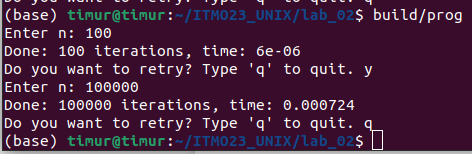

## Задание 2. Создать и скомпилировать программу на Python 3
Результат сборки (компиляции) сохранять в папку build. Папку build сделать
игнорируемой для GIT. Программа должна получать на вход число – это
количество итераций для выполнения расчета. В рамках итерации выполнять
следующее вычисление: x ^2- x ^2+ x *4- x *5+ x + x . Вычисление выполнять в виде
отдельной от main функции, которая будет вызвана циклически из main.
Фиксировать время выполнения программы, затрачиваемое на расчет выражения
n раз (n задается в консоли перед вычислением). Предусмотреть дополнительный
цикл на повторную итерацию запуска программы вычислений. Если было введено
не число, то завершить выполнение программы.

Создадим файл prog.py со следующим содержанием:

In [4]:
import time

def foo(x = 1):
    return x ** 2 - x ** 2 + 4 * x - x * 5 + x + x

while 1:
    n = input('Enter n: ')

    try:
        n = int(n)
    except:
        print('n should be an natural digit')
        exit()

    iter_time = time.time()

    for _ in range(n):
        foo()

    iter_time = time.time() - iter_time
    print(f'Done: {n} iterations: {iter_time}')

    retry = input('Do you want to retry? Type \'q\' to quit. ')
    if retry == 'q':
        break

Enter n: 10
Done: 10 iterations: 4.696846008300781e-05
Do you want to retry? Type 'q' to quit. q


Пример работы программы:
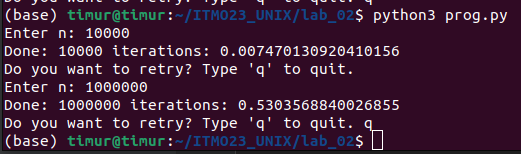

Ну, и давайте построим графики, сравнивающие время работы.

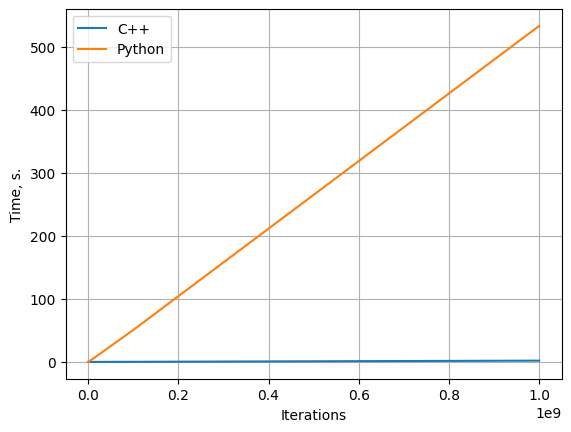

In [28]:
import matplotlib.pyplot as plt
import numpy as np
c = [2e-6, 3e-5, 0.000174, 0.001711, 0.017699, 0.187002, 2.02836]
plt.plot(N, c)
plt.plot(N, python)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Time, s.')
plt.legend(['C++', 'Python'])
plt.show()

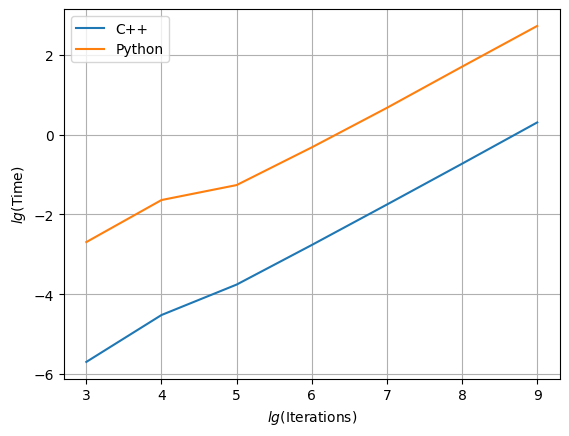

In [31]:
c = [2e-6, 3e-5, 0.000174, 0.001711, 0.017699, 0.187002, 2.02836]
plt.plot(np.log10(N), np.log10(c))
plt.plot(np.log10(N), np.log10(python))
plt.grid(True)
plt.xlabel('$lg($Iterations)')
plt.ylabel('$lg($Time)')
plt.legend(['C++', 'Python'])
plt.show()

Скрипты для подсчета:

    - python - ниже, в ячейке
    - c++ - файл `for_compare.cpp`

In [ ]:
def for_compare(n: int):
    iter_time = time.time()
    for _ in range(n):
        foo()
    iter_time = time.time() - iter_time
    return iter_time

In [8]:
N = [10 ** i for i in range(3, 10)]
python = for_compare(n) for n in N]

In [15]:
with open('python_results.txt', 'w') as f:
    for item in zip(N, python):
        f.write(str(item[0]) + ' - ' + str(item[1]) + '\n')

In [16]:
for x in zip(N, python):
    print(x)

(1000, 0.0020248889923095703)
(10000, 0.022936582565307617)
(100000, 0.05444669723510742)
(1000000, 0.48033857345581055)
(10000000, 4.7073822021484375)
(100000000, 50.72568106651306)
(1000000000, 533.3421776294708)
